In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

warnings.filterwarnings('ignore')


sns.set(style='white', context='notebook', palette='deep')
%matplotlib inline

In [2]:
# 決定境界 と データセット を可視化する関数群
def plot_decision_boundary(classifier, X, y):
    x1 = np.linspace(X[:, 0].min() - 1.0,
                     X[:, 0].max() + 1.0,
                     num=100)
    x2 = np.linspace(X[:, 1].min() - 1.0,
                     X[:, 1].max() + 1.0,
                     num=100)

    x1, x2 = np.meshgrid(x1, x2)

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = classifier.predict(X_new).reshape(100, 100)

    plt.contourf(x1, x2, y_pred, alpha=.2, cmap="spring")

    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])

# 線形分離可能な場合

## データの準備


In [3]:
from sklearn.datasets import make_blobs

blobs = make_blobs(n_samples=100,
                   n_features=2,
                   centers=2,
                   cluster_std=1,
                   random_state=1)

X = blobs[0]
y = blobs[1]

In [4]:
X.shape, y.shape

((100, 2), (100,))

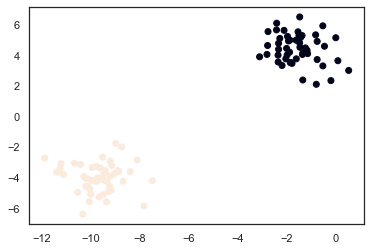

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# モデルの訓練

In [7]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()

perceptron.fit(X_train, y_train)

# スコアの表示
print(perceptron.score(X_train, y_train))
print(perceptron.score(X_test, y_test))

1.0
1.0


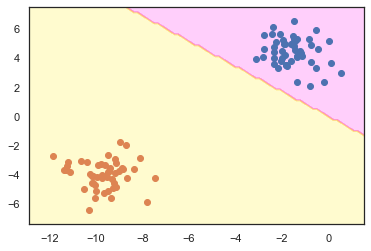

In [8]:
plot_decision_boundary(perceptron, X, y)

# 線形分離不可能な場合その1

## データの準備

In [9]:
blobs = make_blobs(n_samples=100,
                   n_features=2,
                   centers=2,
                   cluster_std=4,
                   random_state=1)

X = blobs[0]
y = blobs[1]

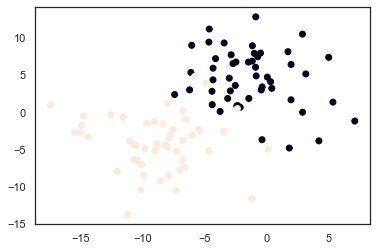

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## モデルの訓練

In [12]:
perceptron = Perceptron()

perceptron.fit(X_train, y_train)

# スコアの表示
print(perceptron.score(X_train, y_train))
print(perceptron.score(X_test, y_test))

0.92
0.8


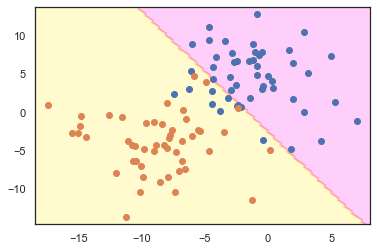

In [13]:
plot_decision_boundary(perceptron, X, y)

# 線形分離不可能な場合その2

## データの準備


In [14]:
from sklearn.datasets import make_moons

moon = make_moons(n_samples=100, noise=0.2, random_state=0)

X = moon[0]
y = moon[1]

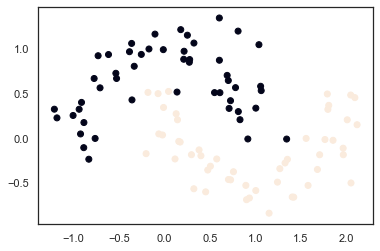

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## モデルの訓練

In [17]:
perceptron = Perceptron()

perceptron.fit(X_train, y_train)

# スコアの表示
print(perceptron.score(X_train, y_train))
print(perceptron.score(X_test, y_test))

0.8133333333333334
0.8


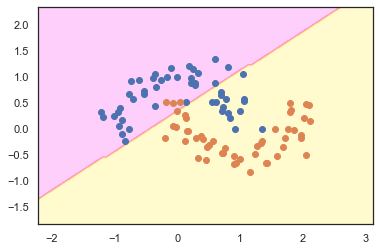

In [18]:
plot_decision_boundary(perceptron, X, y)